In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("train.csv")
data
f = plt.figure(figsize=(24, 4))

<Figure size 2400x400 with 0 Axes>

In [3]:
nd=data[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']]
nd

,LotArea,GrLivArea,TotalBsmtSF,GarageArea
0,8450,1710,856,548
1,9600,1262,1262,460
2,11250,1786,920,608
3,9550,1717,756,642
4,14260,2198,1145,836
...,...,...,...,...
1455,7917,1647,953,460
1456,13175,2073,1542,500
1457,9042,2340,1152,252
1458,9717,1078,1078,240


<AxesSubplot: >

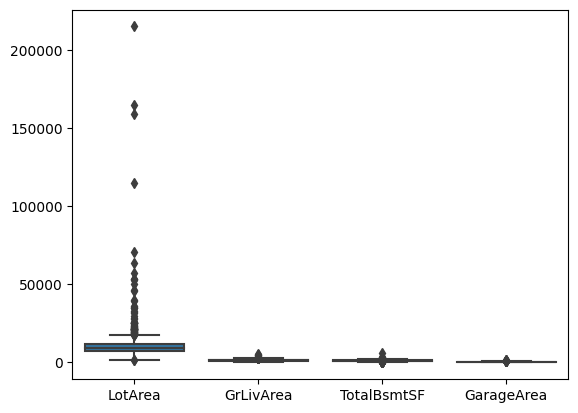

In [4]:
sb.boxplot(data=nd)

In [5]:
nd.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137
std,9981.264932,525.480383,438.705324,213.804841
min,1300.000000,334.000000,0.000000,0.000000
25%,7553.500000,1129.500000,795.750000,334.500000
50%,9478.500000,1464.000000,991.500000,480.000000
75%,11601.500000,1776.750000,1298.250000,576.000000
max,215245.000000,5642.000000,6110.000000,1418.000000


In [6]:
for i in nd:
    count=0
    v=nd[i]
    q3=v.quantile(.75)
    q1=v.quantile(.25)
    iqr=(q3-q1)*1.5
    for w in v:
        if (w<q1-iqr)|(w>q3+iqr):
            count=count+1
    print(i,count)        

LotArea 69
GrLivArea 31
TotalBsmtSF 61
GarageArea 21


LotArea 12.207687851233496
GrLivArea 1.3665603560164552
TotalBsmtSF 1.5242545490627664
GarageArea 0.17998090674623907


LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
dtype: float64

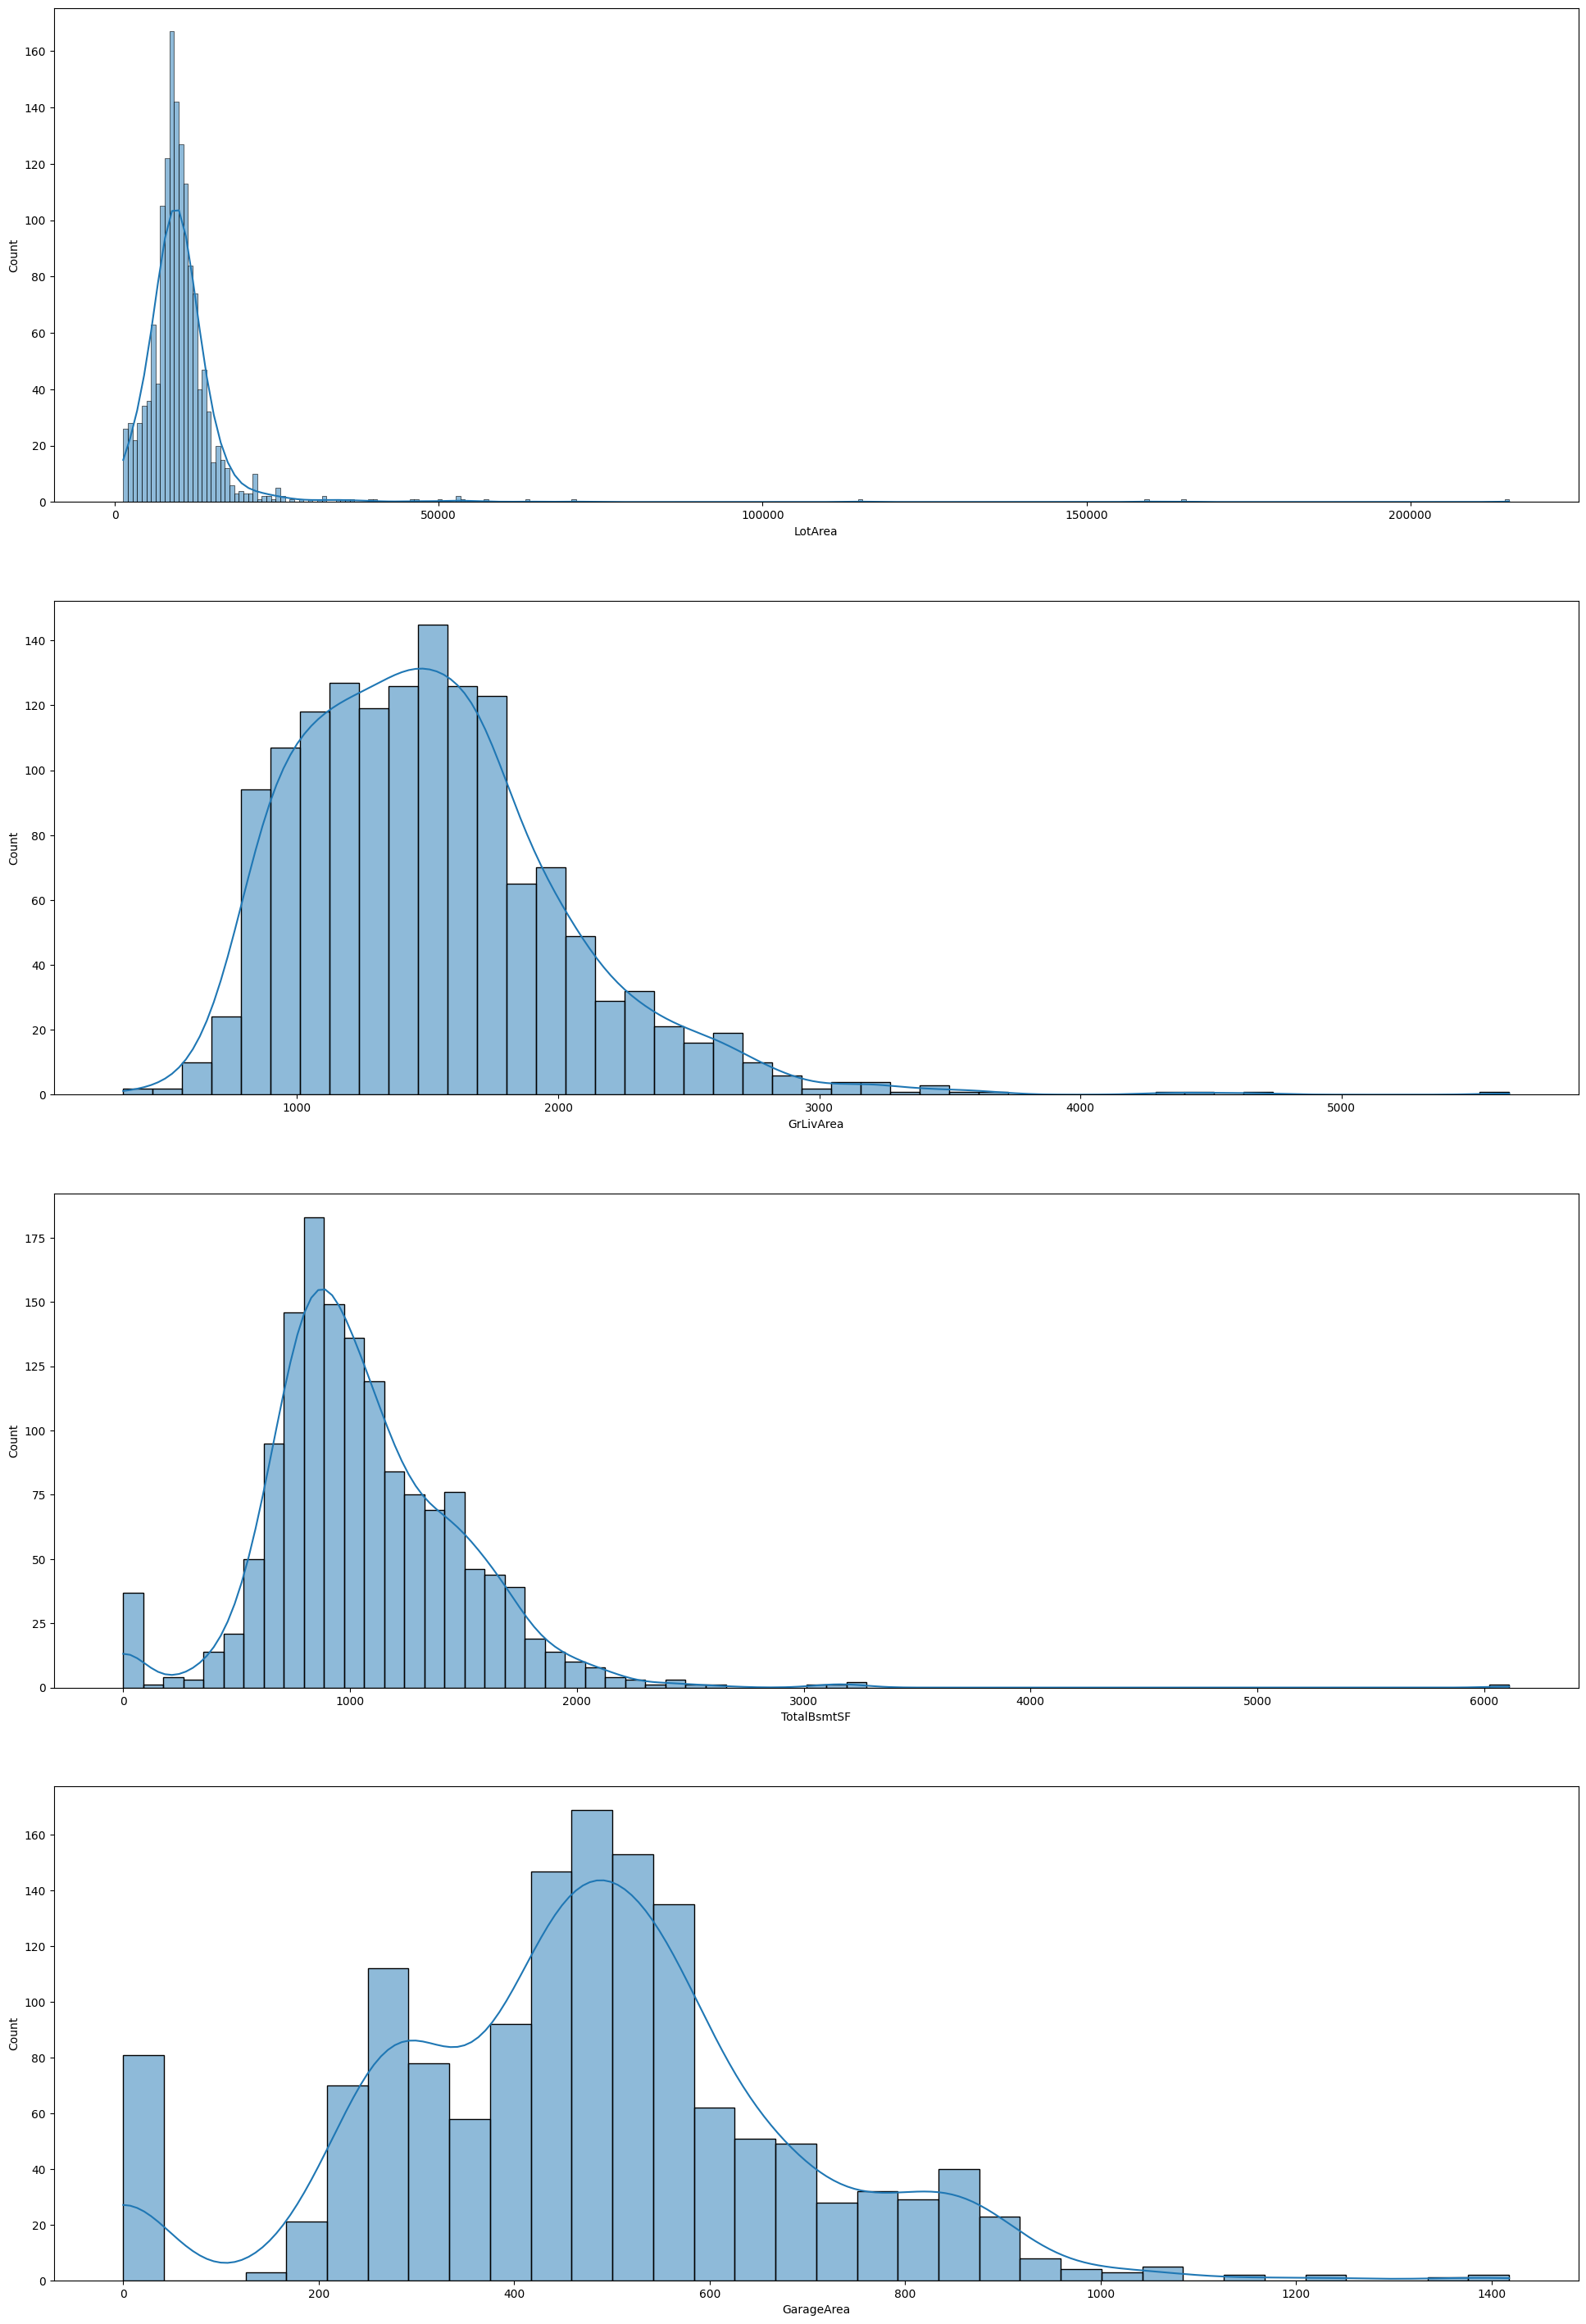

In [7]:
sp=data["SalePrice"]
f, axes = plt.subplots(4, 1, figsize=(24, 36))
cnt=0
for i in nd:
    v=nd[i]
    print(i,v.skew())
    sb.histplot(v,kde=True,ax=axes[cnt])
    cnt=cnt+1
nd.skew()    

In [8]:
for i in nd:
    v=nd[i]
    print(i,sp.corr(v,method="pearson"))

LotArea 0.2638433538714057
GrLivArea 0.7086244776126521
TotalBsmtSF 0.6135805515591956
GarageArea 0.6234314389183617


In [9]:
nd1=data[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']]
nd1

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8
...,...,...,...,...
1455,60,Gilbert,1Fam,6
1456,20,NWAmes,1Fam,6
1457,70,Crawfor,1Fam,7
1458,20,NAmes,1Fam,5


In [10]:
nd1.nunique()#.sort_values(ascending=False)

MSSubClass      15
Neighborhood    25
BldgType         5
OverallQual     10
dtype: int64

In [11]:
nd1.mode()

,MSSubClass,Neighborhood,BldgType,OverallQual
0,20,NAmes,1Fam,5


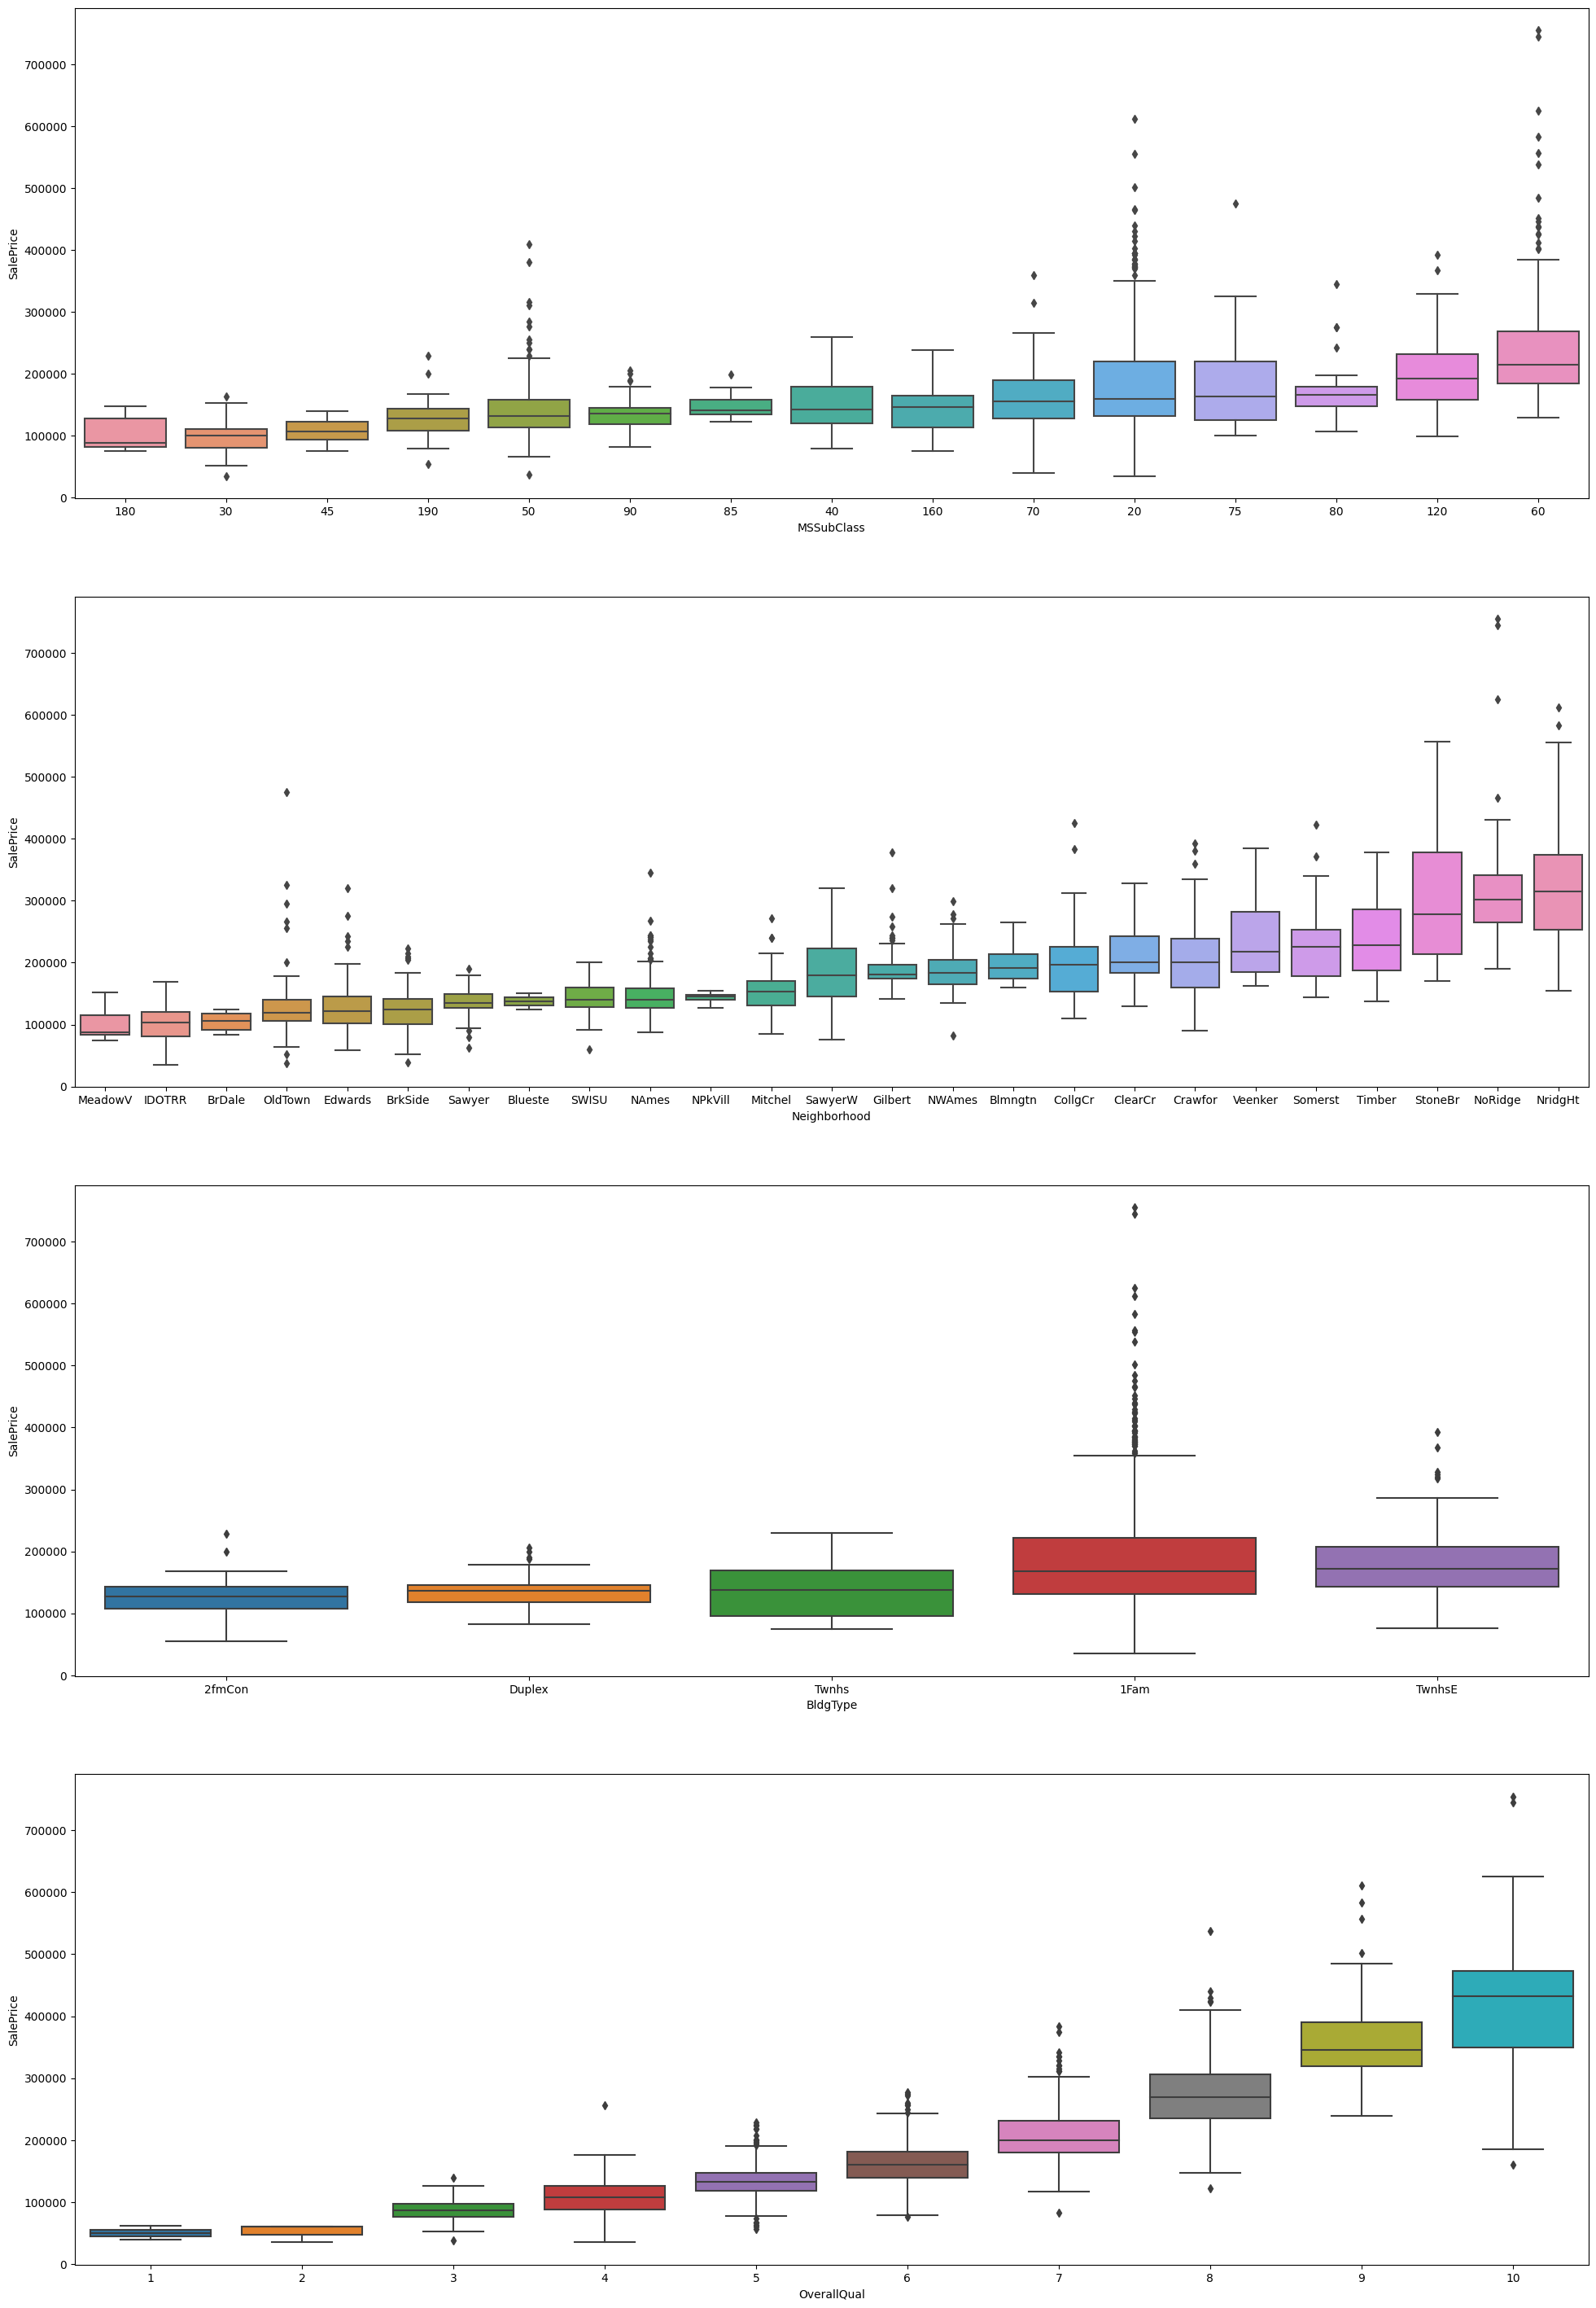

In [12]:
f, axes = plt.subplots(4, 1, figsize=(24, 36))
count=0
for i in nd1:
    di=pd.concat([nd1[i],sp],axis=1).reindex(sp.index)
    
    sb.boxplot(data=di,x=nd1[i],y=sp,order=data.groupby(i)["SalePrice"].median().sort_values().index,ax=axes[count])
    count=count+1

In [13]:
dg=data["GarageType"]
dg


0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType, Length: 1460, dtype: object

In [14]:
li=[]
for i in dg:
    if pd.isna(i):
        li.append("No")
    else:
        li.append("Garage")
pli=pd.Series(li)

<AxesSubplot: ylabel='SalePrice'>

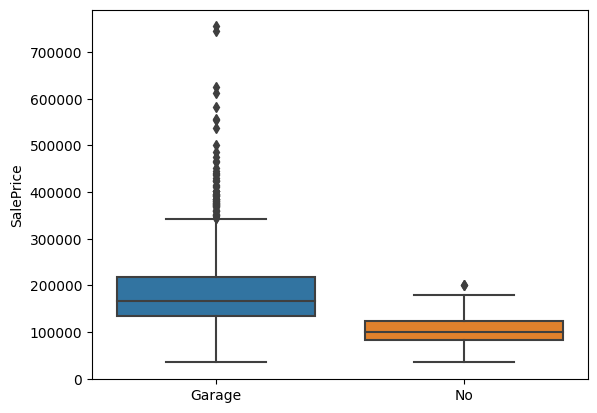

In [15]:
di=pd.concat([pli,sp],axis=1).reindex(sp.index)
sb.boxplot(data=di,x=pli,y=sp)

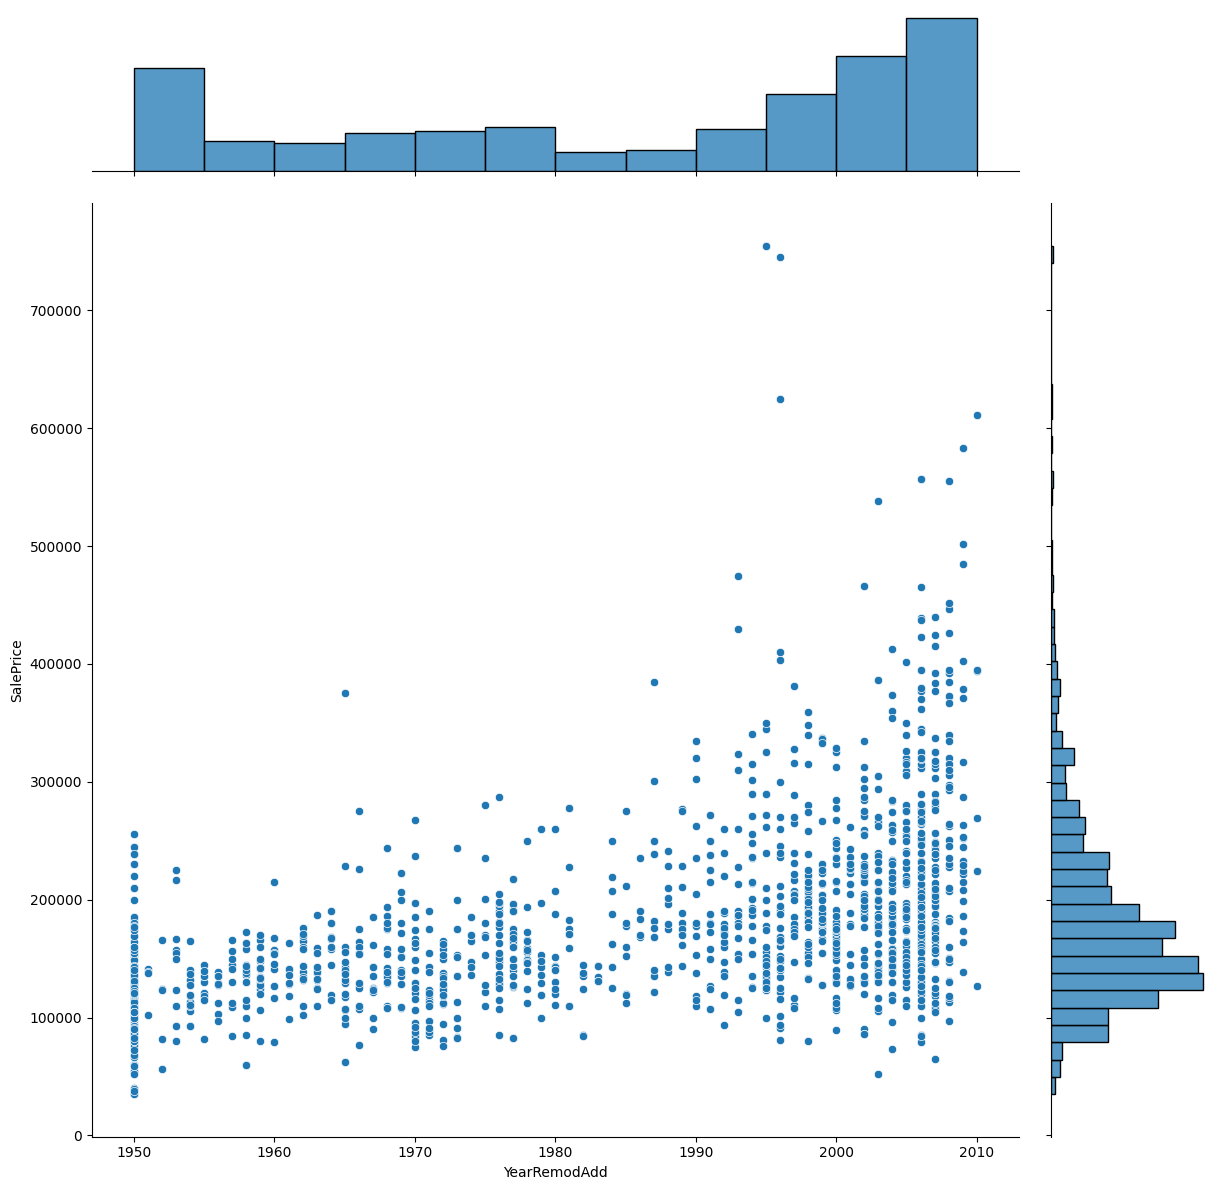

In [16]:
rm=data["YearRemodAdd"]
di=pd.concat([rm,sp],axis=1).reindex(sp.index)
sb.jointplot(data=di,y="SalePrice",x="YearRemodAdd",height=12)

<AxesSubplot: xlabel='YearRemodAdd', ylabel='SalePrice'>

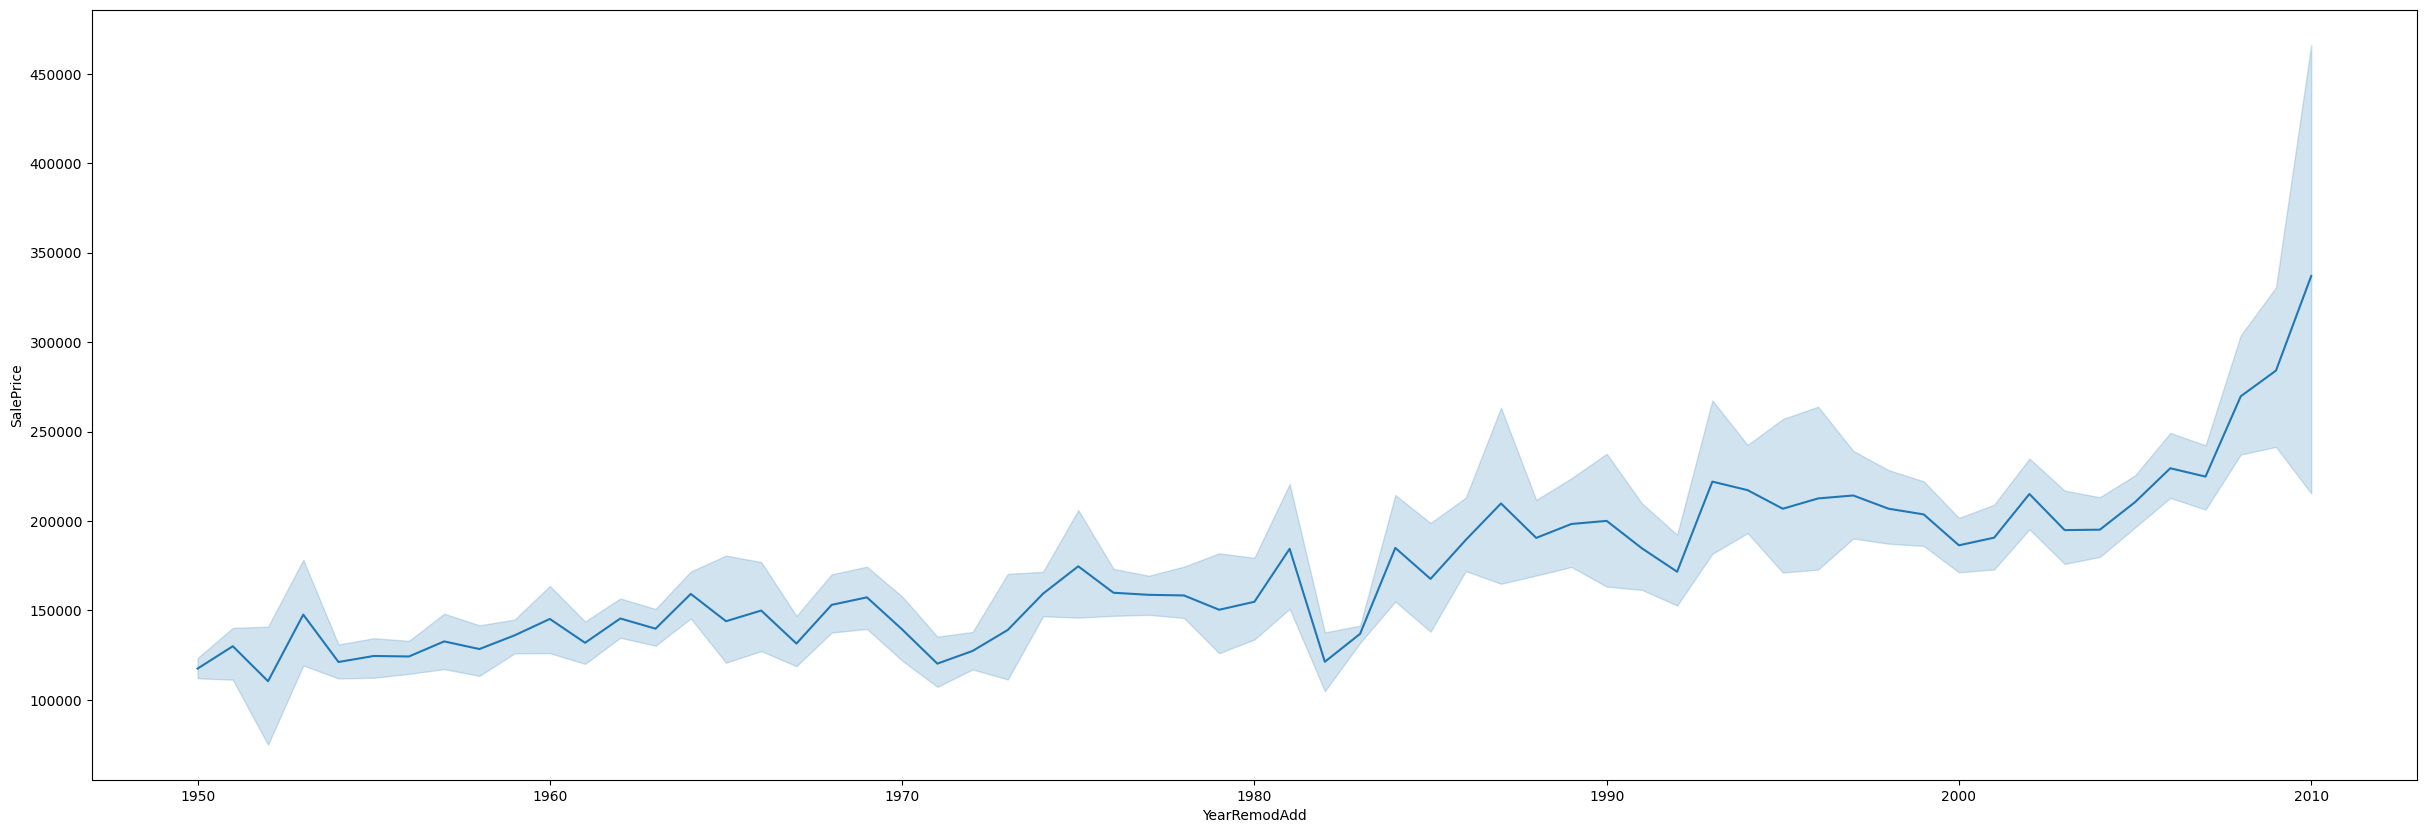

In [17]:
f = plt.figure(figsize=(30, 10))
sb.lineplot(data=di,x=rm,y=sp)
#sb.boxplot(data=di,x=rm,y=sp,order=data.groupby("YearRemodAdd")["SalePrice"].median().sort_values().index)